## Renewable Energy Usage Analysis
### Datasets 
Datasets are available in CSV format
1. Renewable Energy Consumption
2. Renewable energy Production datasets  These datasets are available on Moodle: share-of-electricityproduction-from-renewable-sources.csv (the production dataset) and renewable-energyconsumption-by-country.csv (the consumption dataset)
### Task definition 
The  task is to create*** choropleth
ma***ps for the total renewable energy production and consumption across different countries it
the world anima ed based on the production/consumption years between (excluding) 2007 ad 
20

### Methodology snapshot
High-level steps
1. Load the renewable energy production dataset. 
2. Sort the production DataFrame based on the Year feature. 
3. Generate a choropleth map for renewable energy production using t***he plotly expr ss
module animated based on ***Year. 
4. Update the layout to include a suitable projection style and title text, then displaythe 
figure. 
5. Load the renewable energy consumption dataset. 
6. Convert the consumption DataFrame to a suitable format for visualization. 
7. Sort the consumption DataFrame based on the Year feature. 
8. Generate a choropleth map for renewable energy consumption using  he plotly
express module animated based on Year. 
9. Update the layout to include a suitable projection style and title text, ten isplae 
figure. 7. 


### Import liabraries

In [19]:
import pandas as pd
import numpy as ny 
import matplotlib.pyplot as plt 
import seaborn as sns

#### Read dataset and show the data

In [20]:
Renew_pro = pd.read_csv('share-of-electricity-production-from-renewable-sources.csv')

In [21]:
Renew_pro.head()

Country Code  Year  Renewable electricity (% electricity production)
0  Afghanistan  AFG  1990                                         67.730496
1  Afghanistan  AFG  1991                                         67.980296
2  Afghanistan  AFG  1992                                         67.994310
3  Afghanistan  AFG  1993                                         68.345324
4  Afghanistan  AFG  1994                                         68.704512

### Sorting data by year

In [22]:
Sorted = Renew_pro.sort_values(by='Year', ascending = False)

### Generating choropleth map for renewable energy production using the ***plotly express module animated based on Year***.

In [23]:
import plotly.express as px

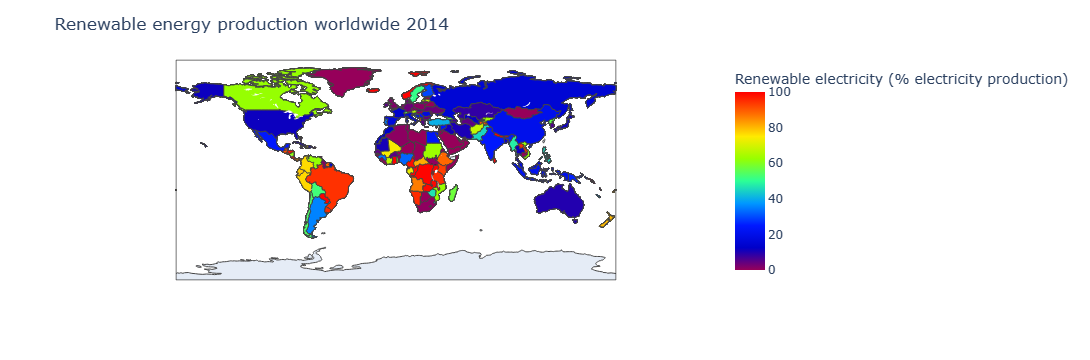

In [24]:
fig = px.choropleth(Sorted, # Where am i getting my data from
                    locations='Code', #What location in the data 
                    color =('Renewable electricity (% electricity production)'),# This is the numerical value that we are plotting, as it changes the color changes 
                    hover_name = 'Year',
                    color_continuous_scale = px.colors.sequential.Rainbow,
                    
                   
)
fig.update_layout(title_text='Renewable energy production worldwide 2014')
fig.show()

In [25]:
Sorted['Year'].unique()

array([2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004,
       2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993,
       1992, 1991, 1990], dtype=int64)

### Insight
As show in the choropleth plot which is the map of the world, we can see that the plot as generated the amount of renewable energy generated by each continent, and we can also interact individually with each country and see the amount of renewable energy they generated. But, the insight in front of us is only for year 2014. This is because Chropleth plot plotted by default the most resent year in our dataset which is year 2014 after we sorted the year in descending order. It will be nice to see the production for all the years in one plot to give us a larger insight.

### Animating with 'Year'

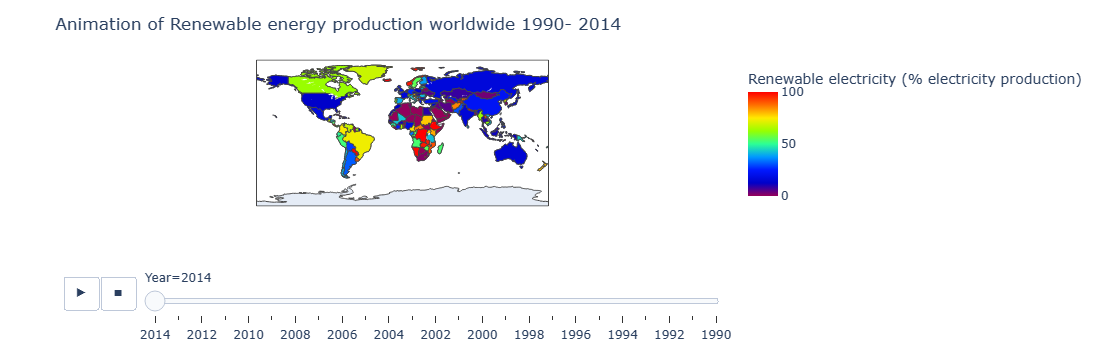

In [26]:
fig = px.choropleth(Sorted, # Where am i getting my data from
                    locations='Code', #What location in the data 
                    color =('Renewable electricity (% electricity production)'),# This is the numerical value that we are plotting, as it changes the color changes 
                    hover_name = 'Year',
                    animation_frame='Year',
                    color_continuous_scale = px.colors.sequential.Rainbow,
                    
                   
)
fig.update_layout(title_text='Animation of Renewable energy production worldwide 1990- 2014')
fig.show()

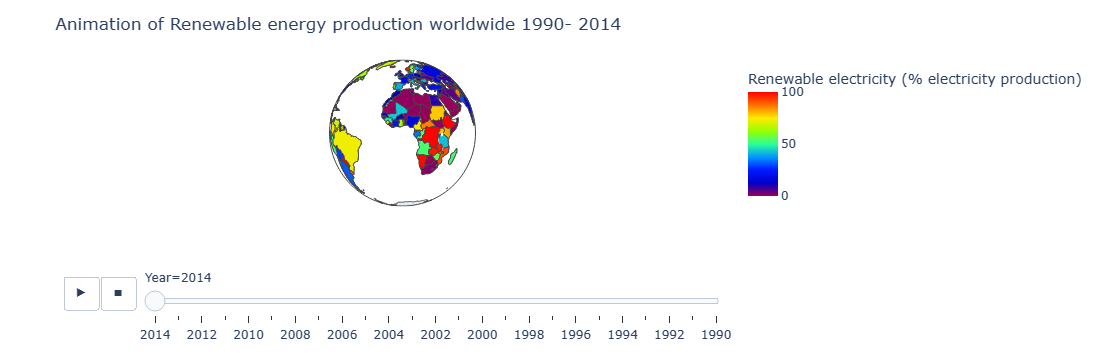

In [27]:
fig = px.choropleth(Sorted, # Where am i getting my data from
                    locations='Code', #What location in the data 
                    color =('Renewable electricity (% electricity production)'),# This is the numerical value that we are plotting, as it changes the color changes 
                    hover_name = 'Year',
                    animation_frame='Year',
                    color_continuous_scale = px.colors.sequential.Rainbow,
                    
                   
)
fig.update_layout(title_text='Animation of Renewable energy production worldwide 1990- 2014',
                 geo=dict(projection={'type':'orthographic'}))
fig.show()

### Load the renewable energy consumption dataset and show the data.

In [28]:
Renew_cons = pd.read_csv('renewable-energy-consumption-by-country.csv')

In [29]:
Renew_cons.head()

Country Code  Year  Traditional biofuels  \
0  Algeria  DZA  1965                   NaN   
1  Algeria  DZA  1966                   NaN   
2  Algeria  DZA  1967                   NaN   
3  Algeria  DZA  1968                   NaN   
4  Algeria  DZA  1969                   NaN   

   Other renewables (modern biofuels, geothermal, wave & tidal)  Wind  \
0                                                0.0              0.0   
1                                                0.0              0.0   
2                                                0.0              0.0   
3                                                0.0              0.0   
4                                                0.0              0.0   

   Solar PV  Hydropower  Total  
0       0.0         NaN    0.0  
1       0.0         NaN    0.0  
2       0.0         NaN    0.0  
3       0.0         NaN    0.0  
4       0.0         NaN    0.0

### Convert the consumption DataFrame to a suitable format for visualization
As we can see, there are NAN values in the consumer dataframe

In [30]:
Renew_cons.shape

(3344, 9)

In [31]:
Renew_cons.isnull().sum()

Country                                                            0
Code                                                               0
Year                                                               0
Traditional biofuels                                            3344
Other renewables (modern biofuels, geothermal, wave & tidal)       0
Wind                                                               0
Solar PV                                                           0
Hydropower                                                      3344
Total                                                              0
dtype: int64

As we can see 2 columns in the consumption dataset namely ['Traditional biofuels', 'Hydropower'] are all null-vales. Imputing this values distort the trueness of the data, so it is better to drop them. After all the 2 columns as well don't fit into the context of this visualisation so further justifies the need to drop them.

### Dropping null columns

In [32]:
clean_cons = Renew_cons.drop(['Traditional biofuels', 'Hydropower'], axis = 1)

In [33]:
clean_cons.head()

Country Code  Year  \
0  Algeria  DZA  1965   
1  Algeria  DZA  1966   
2  Algeria  DZA  1967   
3  Algeria  DZA  1968   
4  Algeria  DZA  1969   

   Other renewables (modern biofuels, geothermal, wave & tidal)  Wind  \
0                                                0.0              0.0   
1                                                0.0              0.0   
2                                                0.0              0.0   
3                                                0.0              0.0   
4                                                0.0              0.0   

   Solar PV  Total  
0       0.0    0.0  
1       0.0    0.0  
2       0.0    0.0  
3       0.0    0.0  
4       0.0    0.0

In [34]:
clean_cons.isnull().sum()

Country                                                         0
Code                                                            0
Year                                                            0
Other renewables (modern biofuels, geothermal, wave & tidal)    0
Wind                                                            0
Solar PV                                                        0
Total                                                           0
dtype: int64

### Sort the consumption DataFrame based on the Year feature. 

In [35]:
Renew_cons = clean_cons.sort_values(by='Year',ascending= False)

In [36]:
Renew_cons.head()

Country Code  Year  \
3343               Vietnam  VNM  2016   
2259                 Qatar  QAT  2016   
2207              Portugal  PRT  2016   
3103  United Arab Emirates  ARE  2016   
2155                Poland  POL  2016   

      Other renewables (modern biofuels, geothermal, wave & tidal)      Wind  \
3343                                           0.059162              0.24154   
2259                                           0.000000              0.00000   
2207                                           3.155000             12.48000   
3103                                           0.000000              0.00000   
2155                                           7.816987             12.58700   

      Solar PV      Total  
3343  0.007170   0.307871  
2259  0.009238   0.009238  
2207  0.816000  16.451000  
3103  0.317661   0.317661  
2155  0.124000  20.527987

In [38]:
Renew_cons['Year'].unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995,
       1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984,
       1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973,
       1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965], dtype=int64)

In [40]:
Renew_cons['Year'].value_counts()

2016    67
1999    67
1985    67
1986    67
1987    67
1988    67
1989    67
2015    67
1991    67
1992    67
1993    67
1994    67
1995    67
1996    67
1997    67
1998    67
1990    67
2000    67
2008    67
2001    67
2014    67
2013    67
2011    67
2010    67
2009    67
2012    67
2007    67
2006    67
2005    67
2004    67
2003    67
2002    67
1974    60
1966    60
1967    60
1968    60
1969    60
1970    60
1971    60
1972    60
1973    60
1982    60
1975    60
1976    60
1977    60
1978    60
1979    60
1980    60
1981    60
1983    60
1984    60
1965    60
Name: Year, dtype: int64

In [42]:
Renew_cons= Renew_cons.sort_index(ascending=True)

In [43]:
Renew_cons.head()

Country Code  Year  \
0  Algeria  DZA  1965   
1  Algeria  DZA  1966   
2  Algeria  DZA  1967   
3  Algeria  DZA  1968   
4  Algeria  DZA  1969   

   Other renewables (modern biofuels, geothermal, wave & tidal)  Wind  \
0                                                0.0              0.0   
1                                                0.0              0.0   
2                                                0.0              0.0   
3                                                0.0              0.0   
4                                                0.0              0.0   

   Solar PV  Total  
0       0.0    0.0  
1       0.0    0.0  
2       0.0    0.0  
3       0.0    0.0  
4       0.0    0.0

In [44]:
Renew_cons.tail()

Country Code  Year  \
3339  Vietnam  VNM  2012   
3340  Vietnam  VNM  2013   
3341  Vietnam  VNM  2014   
3342  Vietnam  VNM  2015   
3343  Vietnam  VNM  2016   

      Other renewables (modern biofuels, geothermal, wave & tidal)      Wind  \
3339                                           0.057000             0.087000   
3340                                           0.058000             0.087000   
3341                                           0.059000             0.087000   
3342                                           0.059000             0.154302   
3343                                           0.059162             0.241540   

      Solar PV     Total  
3339   0.00000  0.144000  
3340   0.00000  0.145000  
3341   0.00260  0.148600  
3342   0.00520  0.218502  
3343   0.00717  0.307871

### Generating choropleth map for renewable energy consumption using plotly express and animated based on Year.

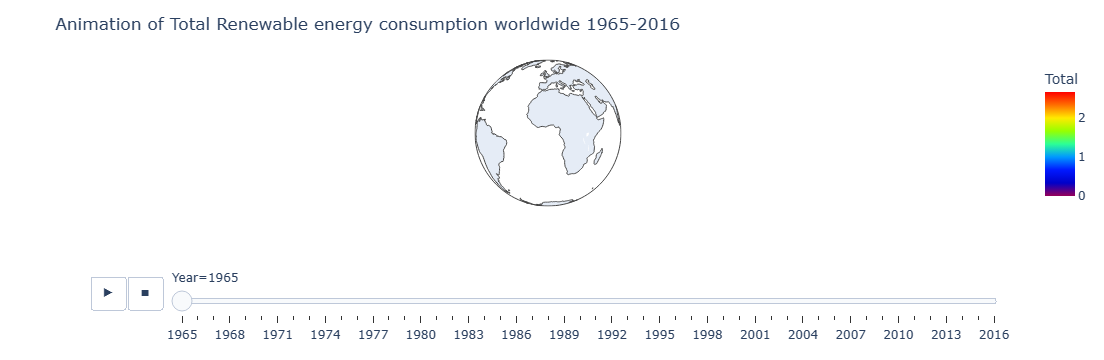

In [50]:
fig = px.choropleth(Renew_cons, # Where am i getting my data from
                    locations='Country', #What location in the data 
                    color =('Total'),# This is the numerical value that we are plotting, as it changes the color changes 
                    hover_name = 'Year',
                    animation_frame='Year',
                    color_continuous_scale = px.colors.sequential.Rainbow,
                    
                   
)
fig.update_layout(title_text='Animation of Total Renewable energy consumption worldwide 1965-2016',
                 geo=dict(projection={'type':'orthographic'}))
fig.show()

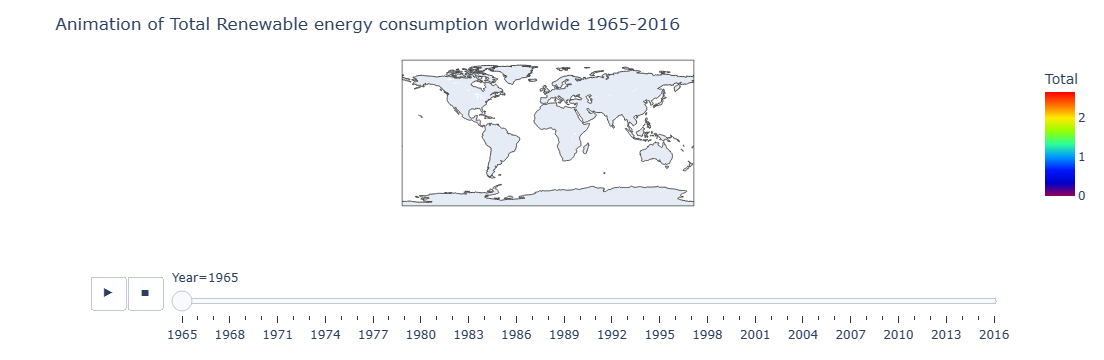

In [49]:
fig = px.choropleth(Renew_cons, # Where am i getting my data from
                    locations='Country', #What location in the data 
                    color =('Total'),# This is the numerical value that we are plotting, as it changes the color changes 
                    hover_name = 'Year',
                    animation_frame='Year',
                    color_continuous_scale = px.colors.sequential.Rainbow,
                    
                   
)
fig.update_layout(title_text='Animation of Total Renewable energy consumption worldwide 1965-2016')
fig.show()

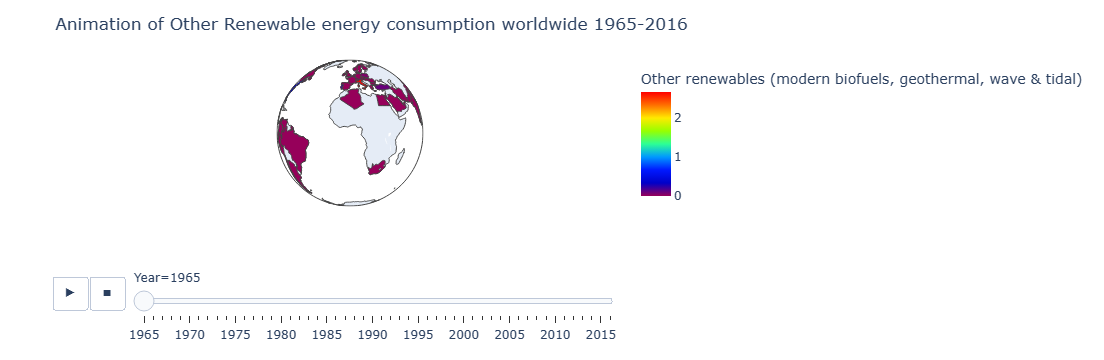

In [48]:
fig = px.choropleth(Renew_cons, # Where am i getting my data from
                    locations='Code', #What location in the data 
                    color =('Other renewables (modern biofuels, geothermal, wave & tidal)'),# This is the numerical value that we are plotting, as it changes the color changes 
                    hover_name = 'Year',
                    animation_frame='Year',
                    color_continuous_scale = px.colors.sequential.Rainbow,
                    
                   
)
fig.update_layout(title_text='Animation of Other Renewable energy consumption worldwide 1965-2016',
                 geo=dict(projection={'type':'orthographic'}))
fig.show()

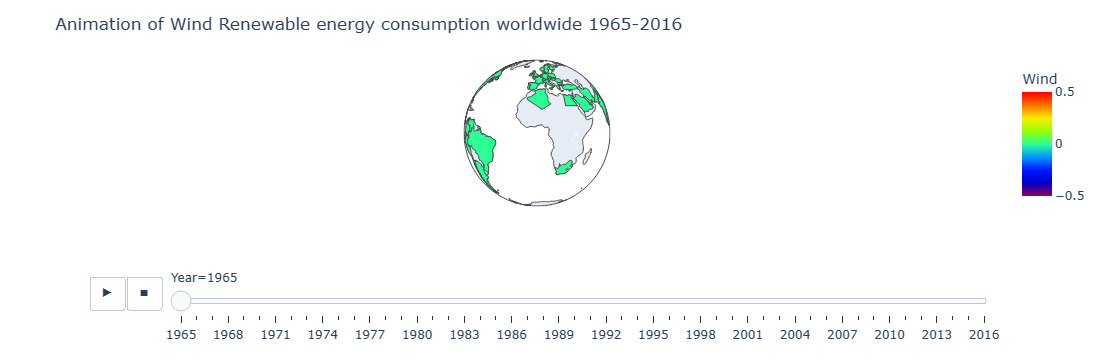

In [51]:
fig = px.choropleth(Renew_cons, # Where am i getting my data from
                    locations='Code', #What location in the data 
                    color =('Wind'),# This is the numerical value that we are plotting, as it changes the color changes 
                    hover_name = 'Year',
                    animation_frame='Year',
                    color_continuous_scale = px.colors.sequential.Rainbow,
                    
                   
)
fig.update_layout(title_text='Animation of Wind Renewable energy consumption worldwide 1965-2016',
                 geo=dict(projection={'type':'orthographic'}))
fig.show()

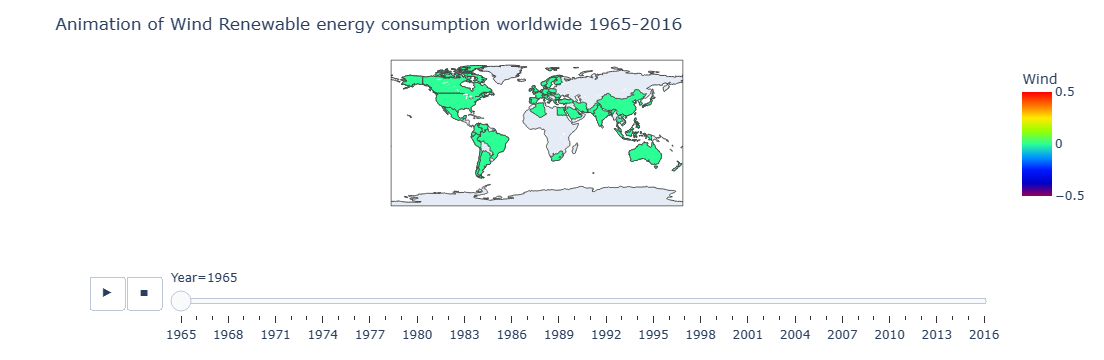

In [52]:
fig = px.choropleth(Renew_cons, # Where am i getting my data from
                    locations='Code', #What location in the data 
                    color =('Wind'),# This is the numerical value that we are plotting, as it changes the color changes 
                    hover_name = 'Year',
                    animation_frame='Year',
                    color_continuous_scale = px.colors.sequential.Rainbow,
                    
                   
)
fig.update_layout(title_text='Animation of Wind Renewable energy consumption worldwide 1965-2016')
fig.show()

Quite a lot to see in this interactive visualisation!!
#### What is the plot displaying?
The plot is showing us the amount of renewable energy of wind source that is consumed by all the countries of the world between 1965 and 2016.
#### Few Insights for the USA
1. The first year wind renewable energy was consumed in the USA was in year 1983. 0.0027 approximately was consumed that year in the USA.
2. In comparison to all other countries in the world, in 1989, the USA saw a significant increase in the amount of wind renewable energy consumed, from an average of 0.005 to approximately 2.13.
3. In 1991. Countries like Indian, Canada, Germany started consuming wind renewable energy.
4. The continent of the world have seemed to be becoming progressively aware of wind renewable in the 2000s. Visual shows that in 2016, the USA AND China were the largest consumer of wind renewable energy, with each consuming 228.77 and 241 respectively. 

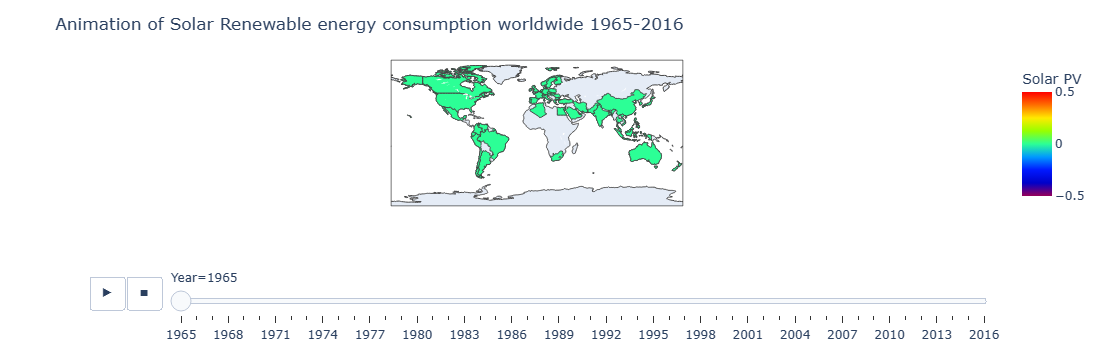

In [53]:
fig = px.choropleth(Renew_cons, # Where am i getting my data from
                    locations='Code', #What location in the data 
                    color =('Solar PV'),# This is the numerical value that we are plotting, as it changes the color changes 
                    hover_name = 'Year',
                    animation_frame='Year',
                    color_continuous_scale = px.colors.sequential.Rainbow,
                    
                   
)
fig.update_layout(title_text='Animation of Solar Renewable energy consumption worldwide 1965-2016')
fig.show()

### What information is this plot showing?
The plot is showing the solar energy consumption around the world between 1965 and 2016

#### Few Insight 
1. When it comes to solar-powered renewable energy, unlike wind renewable, its consumption did not begin until 1983. USA was the first consumer of renewable energy from solar, it consumed 0.003 solar energy in 1983. 
2. In China, however, consumption of solar energy did not begin until 1990, and Republic of China consumed 0.002 solar energy in 1990. But as of that year, the USA had moved up to 0.37 which is a sig increase in consumption from where it was in 1983.
3. The rest of the world continent saw a very tiny awareness and usage of solar energy with countries like Australia, Sweden, India, Canada being more significant than the rest of the world with exception to China and the United States
4. In 2016, USA and China consumed 56.79 and 66.2 solar energy respectively. The latest record of this dataset (2016) Overall ranked China as the highest consumer of solar energy.

# Next goal
1. I want to write a function that plots both production and consumption of renewable chloroplot using PANEL


### Trial below